# This notebook is my attempt at the Kaggle Advanced House Prices competition 
## You can find this at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
## I did all the EDA and cleaning of the data and built two different models. One is a Keras Deep Learning Nueral Net and the other is an XGBoost model. You can find the models at the top of the page and then the EDA further down.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.optimizers import Adam


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [21]:
#This is where all the cleaning and tranformation happens to the data, it is in methods that are called below
#This is going to be used to fix the gargeYrBlt column
def fill_in_garage_yr(YearBuilt,GarageYrBlt):
    if np.isnan(GarageYrBlt):
        return YearBuilt
    else:
        return GarageYrBlt

#Call this method to clean all the data and transform it, put all transformations needed in here
def readAndCleanData(df):
    #dropping uneeded column
    df = df.drop(['Id','Utilities'],axis=1)
    
    #changing some Nan values to NA or 0
    df['LotFrontage'] =df['LotFrontage'].replace(np.nan,0,regex=True)
    df['MasVnrArea'] =df['MasVnrArea'].replace(np.nan,0,regex=True)
    df['Alley'] =df['Alley'].replace(np.nan,'NA',regex=True)
    df['FireplaceQu'] =df['FireplaceQu'].replace(np.nan,'NA',regex=True)
    df['GarageType'] =df['GarageType'].replace(np.nan,'NA',regex=True)
    df['GarageQual'] =df['GarageQual'].replace(np.nan,'NA',regex=True)
    df['GarageCond'] =df['GarageCond'].replace(np.nan,'NA',regex=True)
    df['GarageFinish'] =df['GarageFinish'].replace(np.nan,'NA',regex=True)
    #df['GarageYrBlt'] =df['GarageYrBlt'].replace(np.nan,'NA',regex=True)
    df['PoolQC'] =df['PoolQC'].replace(np.nan,'NA',regex=True)
    df['MiscFeature'] =df['MiscFeature'].replace(np.nan,'NA',regex=True)
    df['Fence'] =df['Fence'].replace(np.nan,'NA',regex=True)
    
    #Fixing the null values in the GarageYrBuilt
    df['GarageYrBlt'] = df.apply(lambda x: fill_in_garage_yr(x['YearBuilt'],x['GarageYrBlt']),axis=1)

    #Getting all the dummies
    dummies= pd.get_dummies(df['MSSubClass'],drop_first=True)
    df = pd.concat([df.drop('MSSubClass',axis=1),dummies],axis=1)
    dummies= pd.get_dummies(df[['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                                'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                'RoofMatl','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 
                                'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 
                                'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
                               ]],drop_first=True)
    df = df.drop(['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                  'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                  'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                   'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                   'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],axis=1)
    
    df = pd.concat([df,dummies],axis=1)
    return df

In [33]:
def readAndCleanData(df):
    #dropping uneeded column
    df = df.drop(['Id','Utilities'],axis=1)
    
    #changing some Nan values to NA or 0
    df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
    df['LotFrontage'].interpolate(method='linear',inplace=True)
    df['LotFrontage']=df['LotFrontage'].astype(int)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
    df['MasVnrArea'].interpolate(method='linear',inplace=True)
    df['MasVnrArea']=df['MasVnrArea'].astype(int)
    df["Alley"] = df["Alley"].fillna("None")
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    df['GarageType'] =df['GarageType'].replace(np.nan,'NA',regex=True)
    df['GarageQual'] =df['GarageQual'].replace(np.nan,'NA',regex=True)
    df['GarageCond'] =df['GarageCond'].replace(np.nan,'NA',regex=True)
    df['GarageFinish'] =df['GarageFinish'].replace(np.nan,'NA',regex=True)
    #df['GarageYrBlt'] =df['GarageYrBlt'].replace(np.nan,'NA',regex=True)
    df['PoolQC'] =df['PoolQC'].replace(np.nan,'NA',regex=True)
    df['MiscFeature'] =df['MiscFeature'].replace(np.nan,'NA',regex=True)
    df['Fence'] =df['Fence'].replace(np.nan,'NA',regex=True)
    
    #Fixing the null values in the GarageYrBuilt
    df['GarageYrBlt'] = df.apply(lambda x: fill_in_garage_yr(x['YearBuilt'],x['GarageYrBlt']),axis=1)

    #Getting all the dummies
    dummies= pd.get_dummies(df['MSSubClass'],drop_first=True)
    df = pd.concat([df.drop('MSSubClass',axis=1),dummies],axis=1)
    dummies= pd.get_dummies(df[['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                                'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                                'RoofMatl','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                                'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 
                                'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 
                                'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
                               ]],drop_first=True)
    df = df.drop(['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                  'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                  'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                  'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                   'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                   'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],axis=1)
    
    df = pd.concat([df,dummies],axis=1)
    return df

In [34]:
# This cell is for calling the cleaning of the data
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
#Adding a temp sales price for the test set just so I can combine the data together to transform
df_test['SalePrice'] = 0
df = df_train.append(df_test)
df = readAndCleanData(df)
#Now all the data has the same columns and I will split them here into the train and test set and then train the model on the train and then predict on the test
df_train= df[df['SalePrice'] > 0]
df_test = df[df['SalePrice'] == 0]
print(df_train.shape)
print(df_test.shape)
# then I build the model and train as shown below and then predict the prices of the test set and add back the ID column

(1460, 254)
(1459, 254)


In [1]:
#Building the DL model and running it here
#df_train["SalePrice"] = np.log1p(df_train["SalePrice"]) #normalizing the data

#Taking out some extreme outliers
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)

X = df_train.drop('SalePrice',axis=1).values
y = df_train['SalePrice'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test = scaler.transform(df_test.drop('SalePrice',axis=1))


model = Sequential()

model.add(Dense(253,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(253,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(253,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(253,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(253,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)
model.fit(x=X_train,y=y_train,epochs=300,validation_data=(X_test,y_test),batch_size=75,
     callbacks=[early_stop])

plt.figure(figsize=(12,8))

losses = pd.DataFrame(model.history.history)
losses.plot()

predictions = model.predict(X_test)
print(predictions)

print(mean_absolute_error(y_test,predictions))
print(100* (mean_absolute_error(y_test,predictions) / df_train['SalePrice'].mean()))


NameError: name 'df_train' is not defined

In [220]:
final_predictions = model.predict(df_test)
print(final_predictions)

[[112217.26 ]
 [157743.73 ]
 [176528.36 ]
 ...
 [161688.53 ]
 [116510.555]
 [203345.2  ]]


In [213]:
# adding the ID column back
temp_df = pd.read_csv('./test.csv')
temp_df['SalePrice'] = final_predictions
final_df = temp_df[['Id','SalePrice']]
print(final_df.head())

     Id      SalePrice
0  1461  115183.664062
1  1462  159584.296875
2  1463  178797.078125
3  1464  199425.390625
4  1465  174963.500000


In [214]:
def fillInAnyNulls(x):
    if (x == 0):
        return final_df['SalePrice'].mean()
    else: 
        return x

final_df.apply(lambda x: fillInAnyNulls(x['SalePrice']),axis=1) 
final_df.to_csv("final_submission3.csv", index=False)
final_df.head()

,Id,SalePrice
0,1461,115183.664062
1,1462,159584.296875
2,1463,178797.078125
3,1464,199425.390625
4,1465,174963.500000


In [215]:
final_df['SalePrice'].mean()

174868.6875

In [ ]:
from xgboost import XGBRegressor

#Taking out some extreme outliers
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4500) & (df_train['SalePrice']<300000)].index, inplace=True)

X = df_train.drop('SalePrice',axis=1).values
y = df_train['SalePrice'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test = scaler.transform(df_test.drop('SalePrice',axis=1))

my_model = XGBRegressor(n_estimators=2000,learning_rate=0.01)
my_model.fit(X_train, y_train,early_stopping_rounds=15, 
             eval_set=[(X_test, y_test)])

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

[0]	validation_0-rmse:194912.09375
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:193074.31250
[2]	validation_0-rmse:191260.04688
[3]	validation_0-rmse:189459.45312
[4]	validation_0-rmse:187697.93750


C:\Users\towns\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[5]	validation_0-rmse:185935.40625
[6]	validation_0-rmse:184188.89062
[7]	validation_0-rmse:182477.93750
[8]	validation_0-rmse:180769.20312
[9]	validation_0-rmse:179089.21875
[10]	validation_0-rmse:177426.34375
[11]	validation_0-rmse:175768.90625
[12]	validation_0-rmse:174137.92188
[13]	validation_0-rmse:172515.64062
[14]	validation_0-rmse:170903.62500
[15]	validation_0-rmse:169308.85938
[16]	validation_0-rmse:167729.34375
[17]	validation_0-rmse:166167.39062
[18]	validation_0-rmse:164625.03125
[19]	validation_0-rmse:163112.37500
[20]	validation_0-rmse:161602.51562
[21]	validation_0-rmse:160103.39062
[22]	validation_0-rmse:158608.15625
[23]	validation_0-rmse:157150.92188
[24]	validation_0-rmse:155681.93750
[25]	validation_0-rmse:154271.65625
[26]	validation_0-rmse:152860.89062
[27]	validation_0-rmse:151490.95312
[28]	validation_0-rmse:150127.46875
[29]	validation_0-rmse:148754.29688
[30]	validation_0-rmse:147398.82812
[31]	validation_0-rmse:146066.65625
[32]	validation_0-rmse:144736.484

In [28]:
final_predictions = my_model.predict(df_test)
print(final_predictions)

[124876.29 152203.06 180709.8  ... 165399.55 115269.84 215000.8 ]


In [29]:
# adding the ID column back
temp_df = pd.read_csv('./test.csv')
temp_df['SalePrice'] = final_predictions
final_df = temp_df[['Id','SalePrice']]
print(final_df.head())
final_df.to_csv("final_submission5.csv", index=False)
final_df.head()

     Id      SalePrice
0  1461  124876.289062
1  1462  152203.062500
2  1463  180709.796875
3  1464  191918.578125
4  1465  190288.515625


,Id,SalePrice
0,1461,124876.289062
1,1462,152203.062500
2,1463,180709.796875
3,1464,191918.578125
4,1465,190288.515625


## This is a linear regression model that was used just to test

In [55]:
#Linear Regression model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 1.1270769837786428e+28


# EDA: Below will be the data discovery phase and the actual tranformations will be put in the readAndCleanData method above

In [7]:
df['MSSubClass'].value_counts()


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

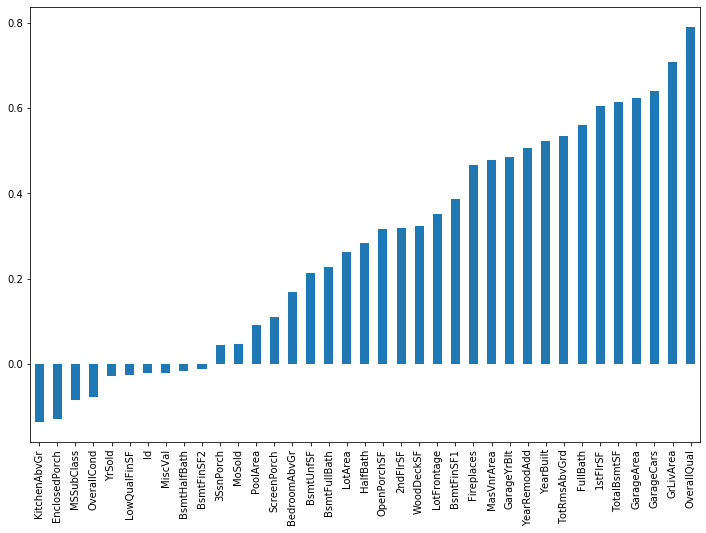

In [16]:
plt.figure(figsize=(12,8))
df.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

## Finding: I can drop the ID column as it serves no purpose

In [18]:
df['Id'].value_counts().sort_values() 

1460    1
1456    1
1455    1
1454    1
1453    1
       ..
21      1
89      1
22      1
43      1
1       1
Name: Id, Length: 1460, dtype: int64

## Finding: The MSSubClass variables need to all be turned into dummy variables

In [41]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [42]:
dummies= pd.get_dummies(df['MSSubClass'],drop_first=True)
df = pd.concat([df.drop('MSSubClass',axis=1),dummies],axis=1)

In [43]:
df.columns

Index([     'MSZoning',   'LotFrontage',       'LotArea',        'Street',
               'Alley',      'LotShape',   'LandContour',     'Utilities',
           'LotConfig',     'LandSlope',  'Neighborhood',    'Condition1',
          'Condition2',      'BldgType',    'HouseStyle',   'OverallQual',
         'OverallCond',     'YearBuilt',  'YearRemodAdd',     'RoofStyle',
            'RoofMatl',   'Exterior1st',   'Exterior2nd',    'MasVnrType',
          'MasVnrArea',     'ExterQual',     'ExterCond',    'Foundation',
            'BsmtQual',      'BsmtCond',  'BsmtExposure',  'BsmtFinType1',
          'BsmtFinSF1',  'BsmtFinType2',    'BsmtFinSF2',     'BsmtUnfSF',
         'TotalBsmtSF',       'Heating',     'HeatingQC',    'CentralAir',
          'Electrical',      '1stFlrSF',      '2ndFlrSF',  'LowQualFinSF',
           'GrLivArea',  'BsmtFullBath',  'BsmtHalfBath',      'FullBath',
            'HalfBath',  'BedroomAbvGr',  'KitchenAbvGr',   'KitchenQual',
        'TotRmsAbvGrd',  

In [52]:
df[[30,40,50,45,50,60,70,75,80]]

,30,40,50,45,50,60,70,75,80
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0
1456,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0
1458,0,0,0,0,0,0,0,0,0


## Finding: The MSZoning variable needs to be made a dummy as well

In [53]:
dummies= pd.get_dummies(df['MSZoning'],drop_first=True)
df = pd.concat([df.drop('MSZoning',axis=1),dummies],axis=1)

In [54]:
df.columns

Index([  'LotFrontage',       'LotArea',        'Street',         'Alley',
            'LotShape',   'LandContour',     'Utilities',     'LotConfig',
           'LandSlope',  'Neighborhood',    'Condition1',    'Condition2',
            'BldgType',    'HouseStyle',   'OverallQual',   'OverallCond',
           'YearBuilt',  'YearRemodAdd',     'RoofStyle',      'RoofMatl',
         'Exterior1st',   'Exterior2nd',    'MasVnrType',    'MasVnrArea',
           'ExterQual',     'ExterCond',    'Foundation',      'BsmtQual',
            'BsmtCond',  'BsmtExposure',  'BsmtFinType1',    'BsmtFinSF1',
        'BsmtFinType2',    'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',
             'Heating',     'HeatingQC',    'CentralAir',    'Electrical',
            '1stFlrSF',      '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',
        'BsmtFullBath',  'BsmtHalfBath',      'FullBath',      'HalfBath',
        'BedroomAbvGr',  'KitchenAbvGr',   'KitchenQual',  'TotRmsAbvGrd',
          'Functional',  

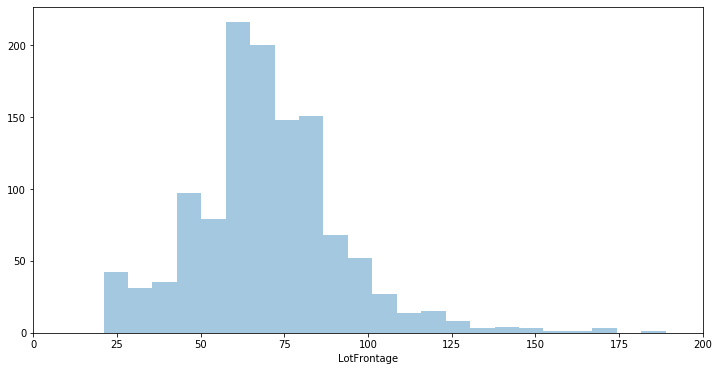

In [79]:
plt.figure(figsize=(12,6))
plt.xlim(0,200)
sns.distplot(df['LotFrontage'],kde=False,bins=40)

In [152]:
print(df['LotFrontage'].shape)
print(df['LotFrontage'].isnull().count())

(1460,)
1460


## Finding: The LotFrontage has no nulls and is a good variable so I am leaving it

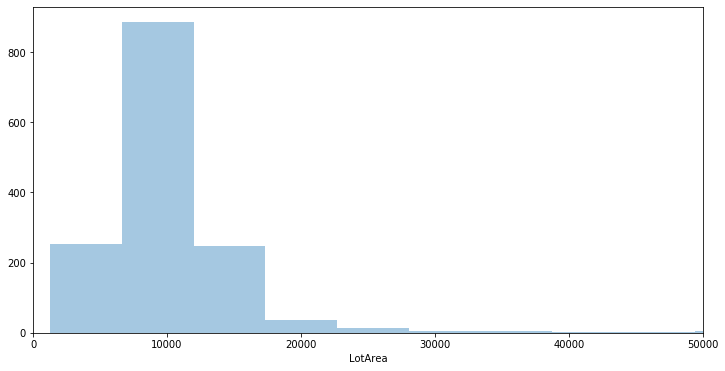

In [82]:
plt.figure(figsize=(12,6))
plt.xlim(0,50000)
sns.distplot(df['LotArea'],kde=False,bins=40)

In [83]:
print(df['LotFrontage'].shape)
print(df['LotFrontage'].isnull().count())

(1460,)
1460


## Finding: The LotArea has no nulls and is a good variable so I am leaving it

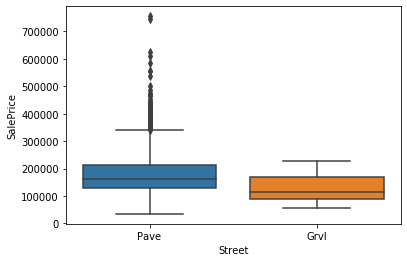

In [85]:
sns.boxplot(data=df, x='Street', y='SalePrice')

In [86]:
print(df['LotFrontage'].shape)
print(df['LotFrontage'].isnull().count())

(1460,)
1460


## Finding: The Street variable only has two options so they need to be made into Dummies

In [87]:
dummies= pd.get_dummies(df['Street'],drop_first=True)
df = pd.concat([df.drop('Street',axis=1),dummies],axis=1)

In [88]:
df.columns

Index([  'LotFrontage',       'LotArea',         'Alley',      'LotShape',
         'LandContour',     'Utilities',     'LotConfig',     'LandSlope',
        'Neighborhood',    'Condition1',    'Condition2',      'BldgType',
          'HouseStyle',   'OverallQual',   'OverallCond',     'YearBuilt',
        'YearRemodAdd',     'RoofStyle',      'RoofMatl',   'Exterior1st',
         'Exterior2nd',    'MasVnrType',    'MasVnrArea',     'ExterQual',
           'ExterCond',    'Foundation',      'BsmtQual',      'BsmtCond',
        'BsmtExposure',  'BsmtFinType1',    'BsmtFinSF1',  'BsmtFinType2',
          'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',       'Heating',
           'HeatingQC',    'CentralAir',    'Electrical',      '1stFlrSF',
            '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',  'BsmtFullBath',
        'BsmtHalfBath',      'FullBath',      'HalfBath',  'BedroomAbvGr',
        'KitchenAbvGr',   'KitchenQual',  'TotRmsAbvGrd',    'Functional',
          'Fireplaces',  

## For the Alley variable I need to change the column names because they overlap with the street variables and then I am going to make them Dummy variables

In [103]:
df['Alley'].value_counts()

AlleyNA      1369
AlleyGrvl      50
AlleyPave      41
Name: Alley, dtype: int64

In [102]:
df['Alley'] =df['Alley'].replace('Grvl','AlleyGrvl')
df['Alley'] =df['Alley'].replace('Pave','AlleyPave')
df['Alley'] =df['Alley'].replace(np.nan,'AlleyNA',regex=True)

In [104]:
dummies= pd.get_dummies(df['Alley'],drop_first=True)
df = pd.concat([df.drop('Alley',axis=1),dummies],axis=1)

In [43]:
df.columns

Index([    'LotFrontage',         'LotArea',       'LotConfig',
             'LandSlope',    'Neighborhood',      'Condition1',
            'Condition2',        'BldgType',      'HouseStyle',
           'OverallQual',     'OverallCond',       'YearBuilt',
          'YearRemodAdd',       'RoofStyle',        'RoofMatl',
           'Exterior1st',     'Exterior2nd',      'MasVnrType',
            'MasVnrArea',       'ExterQual',       'ExterCond',
            'Foundation',        'BsmtQual',        'BsmtCond',
          'BsmtExposure',    'BsmtFinType1',      'BsmtFinSF1',
          'BsmtFinType2',      'BsmtFinSF2',       'BsmtUnfSF',
           'TotalBsmtSF',         'Heating',       'HeatingQC',
            'CentralAir',      'Electrical',        '1stFlrSF',
              '2ndFlrSF',    'LowQualFinSF',       'GrLivArea',
          'BsmtFullBath',    'BsmtHalfBath',        'FullBath',
              'HalfBath',    'BedroomAbvGr',    'KitchenAbvGr',
           'KitchenQual',    'TotRmsAbvG

In [27]:
#Lot Shape
print(df['LotShape'].value_counts())
print(df['LotShape'].shape)
print(df['LotShape'].isnull().count())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
(1460,)
1460


## The LotShape variable needs to be made into a dummy variable for the four categories and there are no nulls so no transformation needs to be made

In [28]:
dummies= pd.get_dummies(df['LotShape'],drop_first=True)
print(dummies)
df = pd.concat([df.drop('LotShape',axis=1),dummies],axis=1)

      IR2  IR3  Reg
0       0    0    1
1       0    0    1
2       0    0    0
3       0    0    0
4       0    0    0
...   ...  ...  ...
1455    0    0    1
1456    0    0    1
1457    0    0    1
1458    0    0    1
1459    0    0    1

[1460 rows x 3 columns]


In [31]:
#LandCountour
print(df['LandContour'].value_counts())
print(df['LandContour'].shape)
print(df['LandContour'].isnull().count())

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
(1460,)
1460


## The LandContour variable needs to be made into a dummy variable for the four categories and there are no nulls so no transformation needs to be made

In [33]:
dummies= pd.get_dummies(df['LandContour'],drop_first=True)
print(dummies)
df = pd.concat([df.drop('LandContour',axis=1),dummies],axis=1)

      HLS  Low  Lvl
0       0    0    1
1       0    0    1
2       0    0    1
3       0    0    1
4       0    0    1
...   ...  ...  ...
1455    0    0    1
1456    0    0    1
1457    0    0    1
1458    0    0    1
1459    0    0    1

[1460 rows x 3 columns]


In [39]:
#Utilities
print(df['Utilities'].value_counts())
print(df['Utilities'].shape)
print(df['Utilities'].isnull().count())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
(1460,)
1460


### Utilities is not neccessary as the data here shows every location has 1 variable except one, so going to drop this one

In [45]:
#LotConfig
print(df['LotConfig'].value_counts())
print(df['LotConfig'].shape)
print(df['LotConfig'].isnull().count())

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
(1460,)
1460


### The LotConfig variable needs to be made into a dummy variable for the four categories and there are no nulls so no transformation needs to be made

In [51]:
#LandSlope
print(df['LandSlope'].value_counts())
print(df['LandSlope'].shape)
print(df['LandSlope'].isnull().count())


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
(1460,)
1460


### The LandSlope variable needs to be made into a dummy variable for the four categories and there are no nulls so no transformation needs to be made

In [55]:
#Neighborhood
print(df['Neighborhood'].value_counts())
print(df['Neighborhood'].shape)
print(df['Neighborhood'].isnull().count())
#The Neighborhood variable needs to be made into a dummy variable for the four categories and there are no nulls so no transformation needs to be made

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
(1460,)
1460


In [64]:
print(df['Condition1'].value_counts())
print(df['Condition1'].shape)
print(df['Condition1'].isnull().count())

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
(1460,)
1460


In [63]:
df['Condition1'].head(10)

0      Norm
1     Feedr
2      Norm
3      Norm
4      Norm
5      Norm
6      Norm
7      PosN
8    Artery
9    Artery
Name: Condition1, dtype: object

In [66]:
#both the conditions can be turned into dummy variables, even though they are structured 
#oddly they can still be used by just turning these values into columns

In [71]:
print(df['BldgType'].value_counts())
print(df['BldgType'].shape)
print(df['BldgType'].isnull().count())
#dummies

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
(1460,)
1460


In [74]:
print(df['HouseStyle'].value_counts())
print(df['HouseStyle'].shape)
print(df['HouseStyle'].isnull().count())
#dummies

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
(1460,)
1460


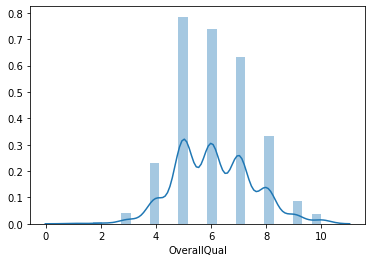

In [80]:
# overall quality
sns.distplot(df['OverallQual'])

In [81]:
df['OverallQual'].isnull().count()

1460

1460


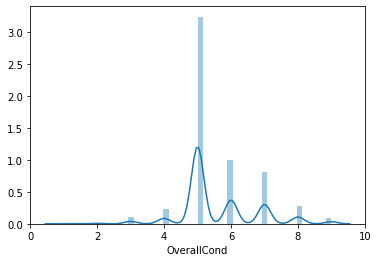

In [84]:
sns.distplot(df['OverallCond'])


In [85]:
print(df['OverallCond'].isnull().count())

1460


In [86]:
#OverallQual and OverallCond are both good as numerical variables and no nulls so they will be left

In [210]:
df['YearBuilt'].isnull().sum()

0

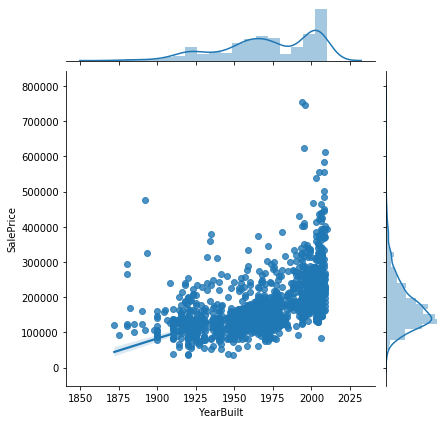

In [102]:
sns.jointplot('YearBuilt','SalePrice',data=df,kind='reg')

In [107]:
## YearBuilt is good

In [111]:
#YearRemodAdd is good as well
print(df['YearRemodAdd'].value_counts())
print(df['YearRemodAdd'].shape)
print(df['YearRemodAdd'].isnull().count())


1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
(1460,)
1460


In [112]:
#RoofStyle needs to be dummies
print(df['RoofStyle'].value_counts())
print(df['RoofStyle'].shape)
print(df['RoofStyle'].isnull().count())

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
(1460,)
1460


In [113]:
#RoofMatl needs to be dummies
print(df['RoofMatl'].value_counts())
print(df['RoofMatl'].shape)
print(df['RoofMatl'].isnull().count())

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
(1460,)
1460


In [116]:
#Exterior1 needs to be dummies
print(df['Exterior1st'].value_counts())
print(df['Exterior1st'].shape)
print(df['Exterior1st'].isnull().count())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
(1460,)
1460


In [117]:
#Exterior2 needs to be dummies
print(df['Exterior2nd'].value_counts())
print(df['Exterior2nd'].shape)
print(df['Exterior2nd'].isnull().count())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
(1460,)
1460


In [118]:
df[['Exterior1st','Exterior2nd']].head(15)

,Exterior1st,Exterior2nd
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
3,Wd Sdng,Wd Shng
4,VinylSd,VinylSd
5,VinylSd,VinylSd
6,VinylSd,VinylSd
7,HdBoard,HdBoard
8,BrkFace,Wd Shng
9,MetalSd,MetalSd


In [121]:
#MasVnrType needs to be dummies
print(df['MasVnrType'].value_counts())
print(df['MasVnrType'].shape)
print(df['MasVnrType'].isnull().count())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
(1460,)
1460


In [178]:
print(df['MasVnrArea'].value_counts())
print(df['MasVnrArea'].shape)
print(df['MasVnrArea'].isnull().sum())
print(df.loc[df['MasVnrArea'].isnull() ==True]['MasVnrArea'])

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64
(1460,)
8
234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64


In [180]:
# I am going to get rid of these 8 null values by just replacing them with 0's since this is likely the case
df['MasVnrArea'] =df['MasVnrArea'].replace(np.nan,0,regex=True)

In [181]:
print(df['MasVnrArea'].isnull().sum())
print(df.loc[df['MasVnrArea'].isnull() ==True]['MasVnrArea'])
#They are all gone now

0
Series([], Name: MasVnrArea, dtype: float64)


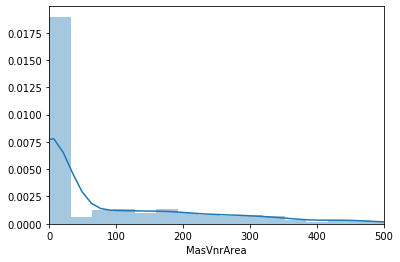

In [130]:
plt.xlim(0,500)
sns.distplot(df['MasVnrArea'])
#This column can be left alone

In [131]:
print(df['ExterQual'].value_counts())
print(df['ExterQual'].shape)
print(df['ExterQual'].isnull().count())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
(1460,)
1460


In [132]:
print(df['ExterCond'].value_counts())
print(df['ExterCond'].shape)
print(df['ExterCond'].isnull().count())

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
(1460,)
1460


In [140]:
print(df['Foundation'].shape)
print(df['Foundation'].isnull().count())
print(df['BsmtQual'].shape)
print(df['BsmtQual'].isnull().count())
print(df['BsmtCond'].shape)
print(df['BsmtCond'].isnull().count())
print(df['BsmtExposure'].shape)
print(df['BsmtExposure'].isnull().count())
print(df['BsmtFinType1'].shape)
print(df['BsmtFinType1'].isnull().count())
print(df['BsmtFinType2'].shape)
print(df['BsmtFinType2'].isnull().count())

KeyError: 'Foundation'

In [138]:
print(df['BsmtFinSF1'].value_counts())
print(df['BsmtFinSF1'].shape)
print(df['BsmtFinSF1'].isnull().count())

0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64
(1460,)
1460


In [141]:
print(df['BsmtFinType2'].shape)
print(df['BsmtFinType2'].isnull().count())


(1460,)
1460


In [142]:
print(df['BsmtUnfSF'].value_counts())
print(df['BsmtUnfSF'].shape)
print(df['BsmtUnfSF'].isnull().count())
print(df['TotalBsmtSF'].value_counts())
print(df['TotalBsmtSF'].shape)
print(df['TotalBsmtSF'].isnull().count())
#These can be left alone

0       118
728       9
384       8
572       7
600       7
       ... 
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64
(1460,)
1460
0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64
(1460,)
1460


In [ ]:
print(df['Heating'].shape)
print(df['Heating'].isnull().count())
print(df['HeatingQC'].shape)
print(df['HeatingQC'].isnull().count())
print(df['CentralAir'].shape)
print(df['CentralAir'].isnull().count())
print(df['Electrical'].shape)
print(df['Electrical'].isnull().count())
#above is dummies, below we can leave those alone
print(df['1stFlrSF'].value_counts())
print(df['1stFlrSF'].shape)
print(df['1stFlrSF'].isnull().count())
print(df['2ndFlrSF'].value_counts())
print(df['2ndFlrSF'].shape)
print(df['2ndFlrSF'].isnull().count())

In [149]:
print(df['LowQualFinSF'].value_counts())
print(df['LowQualFinSF'].shape)
print(df['LowQualFinSF'].isnull().count())
print(df['GrLivArea'].value_counts())
print(df['GrLivArea'].shape)
print(df['GrLivArea'].isnull().count())

print(df['BsmtFullBath'].value_counts())
print(df['BsmtFullBath'].shape)
print(df['BsmtFullBath'].isnull().count())
print(df['BsmtHalfBath'].value_counts())
print(df['BsmtHalfBath'].shape)
print(df['BsmtHalfBath'].isnull().count())

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
(1460,)
1460
864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64
(1460,)
1460
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
(1460,)
1460
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
(1460,)
1460


In [182]:
df.isnull().sum().sort_values(ascending=False).head(15)
# These are the empty values I have left, i missed some of these initially becasue I was not 
#doing the correct isnull calculation

PoolQC             1453
MiscFeature        1406
Fence              1179
FireplaceQu         690
GarageType           81
GarageQual           81
GarageCond           81
GarageFinish         81
GarageYrBlt          81
MSZoning_RH           0
MSZoning_RL           0
85                    0
90                    0
LandContour_Lvl       0
120                   0
dtype: int64

In [167]:
df['LotFrontage'].head(30)

0      65.0
1      80.0
2      68.0
3      60.0
4      84.0
5      85.0
6      75.0
7       0.0
8      51.0
9      50.0
10     70.0
11     85.0
12      0.0
13     91.0
14      0.0
15     51.0
16      0.0
17     72.0
18     66.0
19     70.0
20    101.0
21     57.0
22     75.0
23     44.0
24      0.0
25    110.0
26     60.0
27     98.0
28     47.0
29     60.0
Name: LotFrontage, dtype: float64

In [165]:
df['LotFrontage'].value_counts().sort_values(ascending=False) 
# this variable actully has some missing values so I am going to make them 0's 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
182.0      1
153.0      1
111.0      1
150.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [166]:
df['LotFrontage'] =df['LotFrontage'].replace(np.nan,0,regex=True)

In [161]:
df.select_dtypes(['object']).columns

Index(['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [189]:
df[['Fireplaces','FireplaceQu']]
#The FireplaceQU just needs to be changed from NAN to NA and then made into dummies
#This is what needs to happen for all of the garage columns as well

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
...,...,...
1455,1,TA
1456,2,TA
1457,2,Gd
1458,0,NaN


In [192]:
df.loc[df['GarageCars']==0][['GarageType','GarageCars']]

,GarageType,GarageCars
39,NaN,0
48,NaN,0
78,NaN,0
88,NaN,0
89,NaN,0
...,...,...
1349,NaN,0
1407,NaN,0
1449,NaN,0
1450,NaN,0


In [245]:
df.isnull().sum().sort_values(ascending=False).head(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [246]:
df.isnull().sum().sort_values(ascending=False).head(5)
#All the Null values are now gone

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [201]:
df.select_dtypes(['object']).columns

Index(['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [204]:
#Going to add these last values as dummy variables except for the YrBuilt which should be numerical but is not

In [231]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [218]:
df['GarageYrBlt']

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: object

In [212]:
## I dont want to delete the 81 rows that have No value for garage built becasue they dont have a garage so
## I am going to try and fill these in either based off a related column or just based off the mean

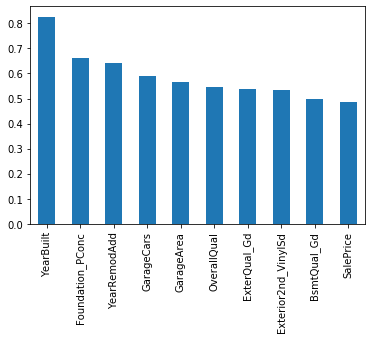

In [223]:
df.corr()['GarageYrBlt'].sort_values(ascending=False).drop('GarageYrBlt').head(10).plot(kind='bar')

In [224]:
#The correlation with YearBuilt is extremly high so let's just fill in our blank values for the year the house 
# was built even though these rows don't really have a garage this should be a pretty fair assesment

In [225]:
def fill_in_garage_yr(YearBuilt,GarageYrBlt):
    if np.isnan(GarageYrBlt):
        return YearBuilt
    else:
        return GarageYrBlt

In [226]:
df['GarageYrBlt'] = df.apply(lambda x: fill_in_garage_yr(x['YearBuilt'],x['GarageYrBlt']),axis=1)

In [227]:
df['GarageYrBlt'].isnull().sum()

0

In [228]:
#Great! so now we have no null values for the GarageYrBuilt and we can leave it as a numerical value
# Time to build our model

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(217)
memory usage: 720.1 KB


In [280]:
pd.set_option('display.max_columns', None)
df.head(1)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,30,40,45,50,60,70,75,80,85,90,120,160,180,190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

In [63]:
df = pd.read_csv('./train.csv')

In [64]:
def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(df)

C:\Users\towns\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\towns\anaconda3\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [288]:


#changing some Nan values to NA or 0
df['LotFrontage'] =df['LotFrontage'].replace(np.nan,0,regex=True)
df['MasVnrArea'] =df['MasVnrArea'].replace(np.nan,0,regex=True)
df['Alley'] =df['Alley'].replace(np.nan,'NA',regex=True)
df['FireplaceQu'] =df['FireplaceQu'].replace(np.nan,'NA',regex=True)
df['GarageType'] =df['GarageType'].replace(np.nan,'NA',regex=True)
df['GarageQual'] =df['GarageQual'].replace(np.nan,'NA',regex=True)
df['GarageCond'] =df['GarageCond'].replace(np.nan,'NA',regex=True)
df['GarageFinish'] =df['GarageFinish'].replace(np.nan,'NA',regex=True)
#df['GarageYrBlt'] =df['GarageYrBlt'].replace(np.nan,'NA',regex=True)
df['PoolQC'] =df['PoolQC'].replace(np.nan,'NA',regex=True)
df['MiscFeature'] =df['MiscFeature'].replace(np.nan,'NA',regex=True)
df['Fence'] =df['Fence'].replace(np.nan,'NA',regex=True)

#Fixing the null values in the GarageYrBuilt
df['GarageYrBlt'] = df.apply(lambda x: fill_in_garage_yr(x['YearBuilt'],x['GarageYrBlt']),axis=1)

#Getting all the dummies
dummies= pd.get_dummies(df['MSSubClass'],drop_first=True)
df = pd.concat([df.drop('MSSubClass',axis=1),dummies],axis=1)
dummies= pd.get_dummies(df[['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
                            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                            'RoofMatl','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                            'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 
                            'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 
                            'PavedDrive', 'PoolQC','Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
                           ]],drop_first=True)
print(dummies)
df = df.drop(['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',
              'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
              'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
              'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
              'HeatingQC','CentralAir','Electrical','KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
               'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],axis=1)
df = pd.concat([df,dummies],axis=1)

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      Alley_NA  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1           0             0           